In [1]:
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, Bidirectional, GRU
import matplotlib.pyplot as plt


### Simple RNN

> It seems that the validation loss and validation accuracy are not improving significantly throughout the training process. A high validation loss and relatively lower validation accuracy may suggest that the model is not performing well on unseen data, indicating a potential issue with overfitting or an insufficiently complex model. The model achieves loss at 0.16 and the training accuracy is 93%.


> The validation accuracy: 77.46%.
> The validation loss: 75.01%.


In [2]:
max_features = 5000
maxlen = 80
batch_size = 200

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train), len(x_test)))

17464789/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [4]:
print('---review---')
print(x_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [5]:
for i in range(0,3):
  print(len(x_train[i]))

218
189
141


In [6]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)

X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [8]:
embedding_size = 32

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(SimpleRNN(32, activation='ReLU'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 32)            160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 164,853
Trainable params: 164,853
Non-trai

In [9]:
from keras.optimizers import Adam

learning_rate = 0.01
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

In [10]:
print(x_train.shape)
print(y_train.shape)

(25000, 80)
(25000,)


In [11]:
batch_size = 120
num_epochs = 30

x_valid, y_valid = x_train[:batch_size], y_train[:batch_size]
x_train_upt, y_train_upt = x_train[batch_size:], y_train[batch_size:]


In [12]:
x_train_upt.shape

(24880, 80)

In [13]:
y_train_upt.shape

(24880,)

In [14]:
history = model.fit(x_train_upt, y_train_upt,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
208/208 [==============================] - 8s 33ms/step - loss: 7.3004 - accuracy: 0.5820 - val_loss: 0.6637 - val_accuracy: 0.5917
Epoch 2/30
208/208 [==============================] - 7s 34ms/step - loss: 0.5207 - accuracy: 0.7383 - val_loss: 0.6211 - val_accuracy: 0.6750
Epoch 3/30
208/208 [==============================] - 7s 36ms/step - loss: 0.3967 - accuracy: 0.8244 - val_loss: 0.4392 - val_accuracy: 0.7750
Epoch 4/30
208/208 [==============================] - 7s 32ms/step - loss: 0.3433 - accuracy: 0.8520 - val_loss: 0.4782 - val_accuracy: 0.7583
Epoch 5/30
208/208 [==============================] - 8s 37ms/step - loss: 0.3108 - accuracy: 0.8709 - val_loss: 0.6194 - val_accuracy: 0.7000
Epoch 6/30
208/208 [==============================] - 6s 30ms/step - loss: 0.3014 - accuracy: 0.8747 - val_loss: 0.4969 - val_accuracy: 0.7667
Epoch 7/30
208/208 [==============================] - 9s 42ms/step - loss: 0.2896 - accuracy: 0.8789 - val_loss: 0.4123 - val_accuracy: 0.8333

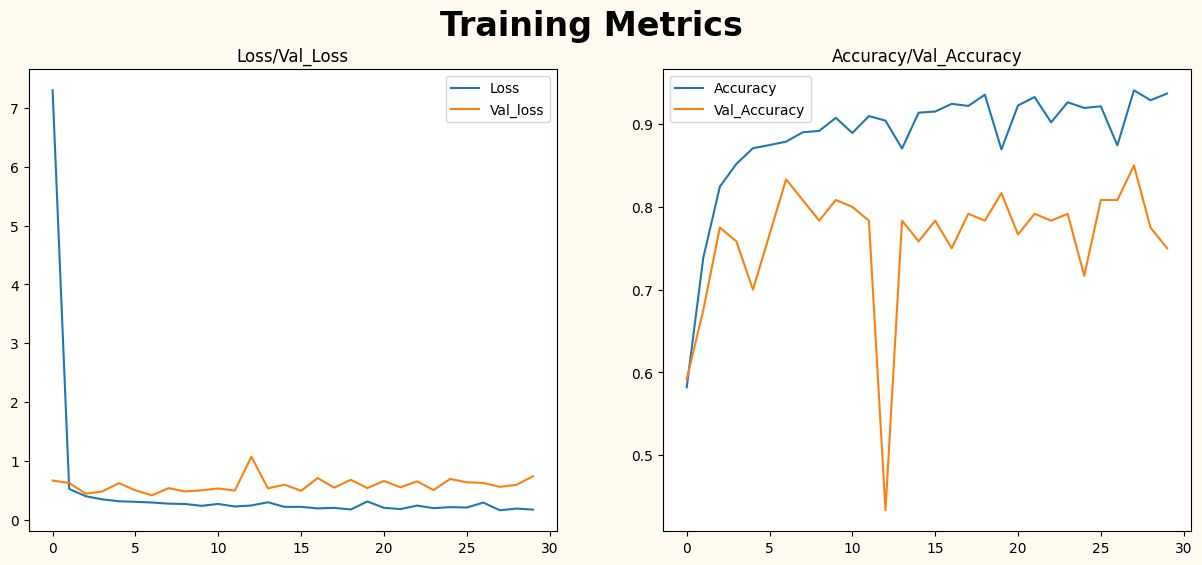

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history.history['loss'], label='Loss')
axes[0].plot(history.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history.history['accuracy'], label='Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

In [198]:
loss_test, acc_test = model.evaluate(x_test, y_test, verbose=0)
print('The test accuracy: {:.2%}.'.format(acc_test))
print('The test score: {:.2%}.'.format(loss_test))

The test accuracy: 77.46%.
The test score: 75.01%.


### Gated Recurrent Unit (GRU)


> It is evident that the validation loss is increasing with each epoch, while the validation accuracy is not improving significantly. These observations indicate that the model may be overfitting to the training data and is not generalizing well to unseen data.


> The test accuracy: 82.30%. The test loss: 51.25%.





In [208]:
max_features = 5000
maxlen = 80
batch_size = 10
num_epochs = 10

In [200]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = imdb.load_data(num_words=max_features)

print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train), len(x_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [201]:
x_train_2 = pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = pad_sequences(x_test_2, maxlen=maxlen)

print('X_train shape:', x_train_2.shape)
print('X_test shape:', x_test_2.shape)

X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [205]:
from keras.regularizers import L2
embedding_size = 32

model_2 = Sequential()
model_2.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_2.add(Bidirectional(GRU(32, kernel_regularizer=L2(0.01))))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 80, 32)            160000    
                                                                 
 bidirectional_23 (Bidirecti  (None, 64)               12672     
 onal)                                                           
                                                                 
 dense_57 (Dense)            (None, 10)                650       
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_58 (Dense)            (None, 1)                 11        
                                                                 
Total params: 173,333
Trainable params: 173,333
Non-trainable params: 0
_______________________________________________

In [206]:
model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [207]:
history_2 = model_2.fit(x_train_2, y_train_2,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        validation_data=(x_test_2, y_test_2))

Epoch 1/10
2500/2500 [==============================] - 183s 71ms/step - loss: 0.5274 - accuracy: 0.7460 - val_loss: 0.3796 - val_accuracy: 0.8353
Epoch 2/10
2500/2500 [==============================] - 178s 71ms/step - loss: 0.3520 - accuracy: 0.8561 - val_loss: 0.3805 - val_accuracy: 0.8342
Epoch 3/10
2500/2500 [==============================] - 166s 67ms/step - loss: 0.3211 - accuracy: 0.8723 - val_loss: 0.3687 - val_accuracy: 0.8398
Epoch 4/10
2500/2500 [==============================] - 175s 70ms/step - loss: 0.3000 - accuracy: 0.8812 - val_loss: 0.3750 - val_accuracy: 0.8393
Epoch 5/10
2500/2500 [==============================] - 171s 68ms/step - loss: 0.2753 - accuracy: 0.8953 - val_loss: 0.3969 - val_accuracy: 0.8415
Epoch 6/10
2500/2500 [==============================] - 163s 65ms/step - loss: 0.2520 - accuracy: 0.9066 - val_loss: 0.3926 - val_accuracy: 0.8394
Epoch 7/10
2500/2500 [==============================] - 178s 71ms/step - loss: 0.2338 - accuracy: 0.9159 - val_loss: 0

In [209]:
loss_test, acc_test = model_2.evaluate(x_test_2, y_test_2, verbose=0)

print('The test accuracy: {:.2%}.'.format(acc_test))
print('The test loss: {:.2%}.'.format(loss_test))

The test accuracy: 82.30%.
The test loss: 51.25%.


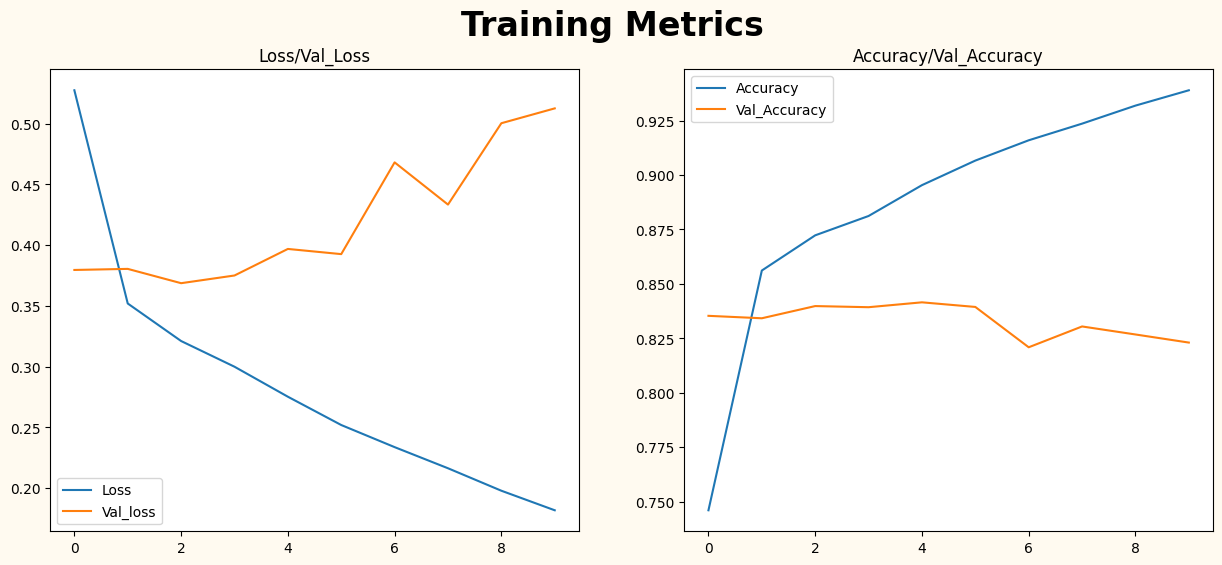

In [210]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history_2.history['loss'], label='Loss')
axes[0].plot(history_2.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history_2.history['accuracy'], label='Accuracy')
axes[1].plot(history_2.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

### LSTM

>  the model achieves a relatively low training loss, 0.04, and high training accuracy, 98%. The validation value loss is at 96% and its accuracy is at 81%. Based on the validation value of loss this model doesn't align between the model's predictions and the ground truth. It should be way lower. Howerver, val acc is high, the model predicted the class labels for 81% of the samples.


> Test loss:96.13%. Test accuracy: 81.66%




In [178]:
max_features = 5000
maxlen = 80
batch_size = 10

In [179]:
(x_train_3, y_train_3), (x_test_3, y_test_3) = imdb.load_data(num_words=max_features)
print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train_3), len(x_test_3)))

Loaded dataset with 25000 training samples, 25000 test samples


In [180]:
x_train_3 = pad_sequences(x_train_3, maxlen=maxlen)
x_test_3 = pad_sequences(x_test_3, maxlen=maxlen)
print('X_train shape:', x_train_3.shape)
print('X_test shape:', x_test_3.shape)

X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [181]:
embedding_size=32

model_3 = Sequential()
model_3.add(Embedding(max_features, embedding_size))
model_3.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_3.add(Dense(1, activation='sigmoid'))


model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, None, 32)          160000    
                                                                 
 lstm_13 (LSTM)              (None, 100)               53200     
                                                                 
 dense_54 (Dense)            (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [183]:
num_epochs = 10
batch_size_3 = 32

history_3 = model_3.fit(x_train_3, y_train_3,
                        batch_size=batch_size_3,
                        epochs=num_epochs,
                        validation_data=(x_test_3, y_test_3))

Epoch 1/10
782/782 [==============================] - 186s 238ms/step - loss: 0.1059 - accuracy: 0.9609 - val_loss: 0.5916 - val_accuracy: 0.8251
Epoch 2/10
782/782 [==============================] - 207s 265ms/step - loss: 0.0899 - accuracy: 0.9675 - val_loss: 0.6676 - val_accuracy: 0.8224
Epoch 3/10
782/782 [==============================] - 213s 273ms/step - loss: 0.0857 - accuracy: 0.9694 - val_loss: 0.8158 - val_accuracy: 0.8168
Epoch 4/10
782/782 [==============================] - 206s 264ms/step - loss: 0.0799 - accuracy: 0.9714 - val_loss: 0.7370 - val_accuracy: 0.8201
Epoch 5/10
782/782 [==============================] - 206s 263ms/step - loss: 0.0669 - accuracy: 0.9765 - val_loss: 0.8231 - val_accuracy: 0.8234
Epoch 6/10
782/782 [==============================] - 205s 262ms/step - loss: 0.0612 - accuracy: 0.9781 - val_loss: 0.8985 - val_accuracy: 0.8159
Epoch 7/10
782/782 [==============================] - 203s 260ms/step - loss: 0.0557 - accuracy: 0.9810 - val_loss: 0.8702 -

In [186]:
score, acc = model_3.evaluate(x_test_3, y_test_3, batch_size=batch_size_3)

print('Test score:{:.2%}'.format(score))
print('Test accuracy: {:.2%}'.format(acc))

782/782 [==============================] - 28s 36ms/step - loss: 0.9613 - accuracy: 0.8166
Test score:96.13%
Test accuracy: 81.66%


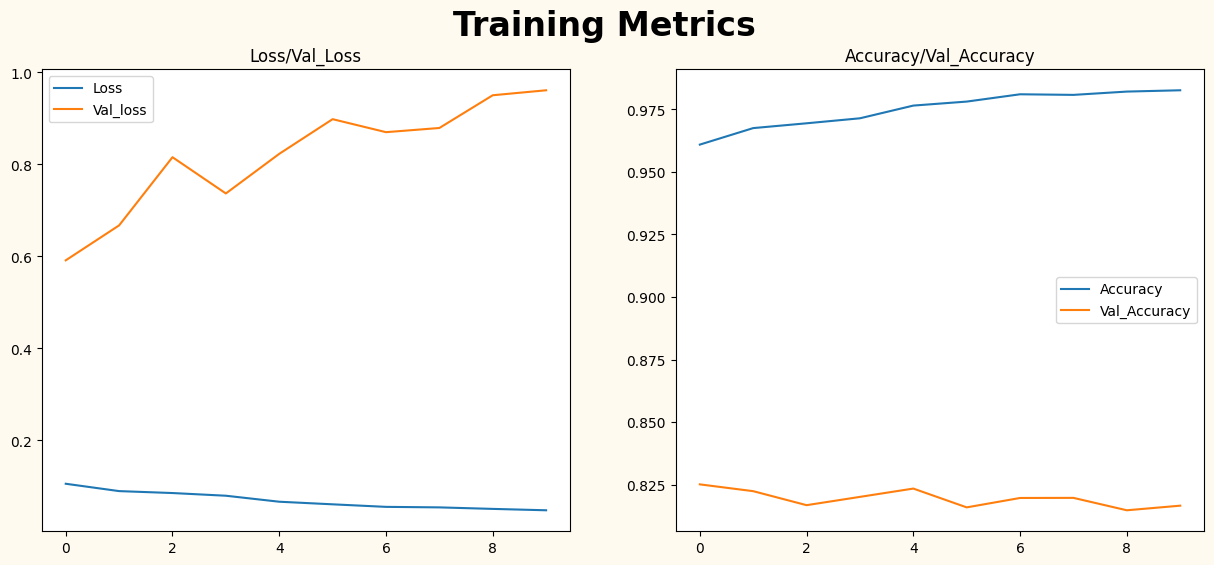

In [187]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history_3.history['loss'], label='Loss')
axes[0].plot(history_3.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history_3.history['accuracy'], label='Accuracy')
axes[1].plot(history_3.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()